In [1]:
%load_ext memory_profiler

In [1]:
import rioxarray as riox

In [2]:
grid_raster = riox.open_rasterio('test-data/arcgis-rasters/grid_to_do_APMMA_NSW_20211018.tif')
grid_raster

<xarray.DataArray (band: 1, y: 8996, x: 11020)>
[99135920 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 8.281e+05 8.282e+05 ... 2.08e+06 2.081e+06
  * y            (y) float64 -3.184e+06 -3.185e+06 ... -4.207e+06 -4.207e+06
    spatial_ref  int64 0
Attributes:
    STATISTICS_MAXIMUM:  1
    STATISTICS_MEAN:     1
    STATISTICS_MINIMUM:  1
    STATISTICS_STDDEV:   0
    _FillValue:          -3.3999999521443642e+38
    scale_factor:        1.0
    add_offset:          0.0

In [4]:
grid_raster.nbytes / 1024**2

378.17352294921875

In [3]:
grid_raster.rio.crs

CRS.from_epsg(9473)

In [4]:
type(grid_raster.rio.crs)

rasterio.crs.CRS

In [5]:
vars(grid_raster.rio.crs)

{'_wkt': None, '_data': None, '_crs': <rasterio._crs._CRS at 0x7f972222c7f0>}

In [6]:
dir(grid_raster.rio.crs)

['__abstractmethods__',
 '__bool__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__copy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_crs',
 '_data',
 '_wkt',
 'data',
 'from_authority',
 'from_dict',
 'from_epsg',
 'from_proj4',
 'from_string',
 'from_user_input',
 'from_wkt',
 'get',
 'is_epsg_code',
 'is_geographic',
 'is_projected',
 'is_valid',
 'items',
 'keys',
 'linear_units',
 'linear_units_factor',
 'to_authority',
 'to_dict',
 'to_epsg',
 'to_proj4',
 'to_string',
 'to_wkt',
 'values',
 'wkt']

In [19]:
grid_raster.rio.crs.to_epsg()

9473

In [26]:
type(grid_raster.rio.crs.to_epsg())

int

In [27]:
from rasterio.crs import CRS

In [28]:
CRS.from_epsg('9473')

CRS.from_epsg(9473)

In [6]:
data_raster = riox.open_rasterio('test-data/arcgis-rasters/apg18e_1_0_0_20210512.tif')
data_raster

<xarray.DataArray (band: 1, y: 4100, x: 7401)>
[30344100 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -3.9e+06 -3.9e+06 -3.898e+06 ... 3.498e+06 3.5e+06
  * y            (y) float64 -1e+06 -1.002e+06 ... -5.098e+06 -5.1e+06
    spatial_ref  int64 0
Attributes:
    SourceBandIndex:  0
    _FillValue:       -3.4028230607370965e+38
    scale_factor:     1.0
    add_offset:       0.0

In [7]:
data_raster.nbytes / 1024**2

115.75355529785156

In [8]:
data_raster.rio.crs

CRS.from_epsg(3577)

In [9]:
%%memit
grid_raster_reprojected = grid_raster.rio.reproject(data_raster.rio.crs)
grid_raster_reprojected

peak memory: 1948.49 MiB, increment: 1748.37 MiB


In [10]:
%%timeit
grid_raster.rio.reproject(data_raster.rio.crs)

3.25 s ± 199 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [11]:
grid_raster_reprojected.x.min().item(), grid_raster_reprojected.x.max().item(), grid_raster_reprojected.y.min().item(), grid_raster_reprojected.y.max().item()

(828074.8224160654, 2080500.359372208, -4206806.462609596, -3184429.8671907284)

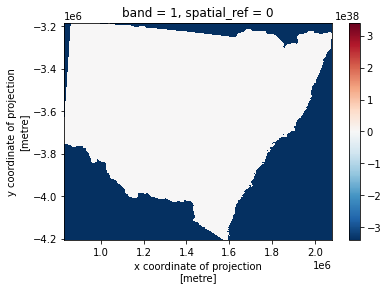

In [12]:
grid_raster_reprojected.plot()

In [13]:
data_raster.x.min().item(), data_raster.x.max().item(), data_raster.y.min().item(), data_raster.y.max().item()

(-3900500.0, 3499500.0, -5099500.0, -1000500.0)

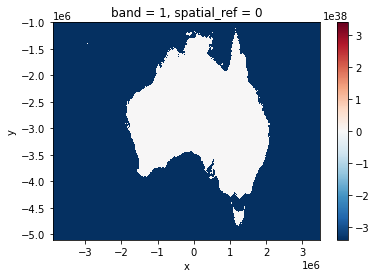

In [14]:
data_raster.plot()

In [16]:
%%time
%%memit
data_raster_resampled_match = data_raster.rio.reproject_match(grid_raster_reprojected)

peak memory: 8778.98 MiB, increment: 726.29 MiB
CPU times: user 2.23 s, sys: 492 ms, total: 2.72 s
Wall time: 2.84 s


In [17]:
data_raster_resampled_match

<xarray.DataArray (band: 1, y: 8996, x: 11020)>
array([[[ 0.000000e+00,  0.000000e+00,  0.000000e+00, ...,
         -3.402823e+38, -3.402823e+38, -3.402823e+38],
        [ 0.000000e+00,  0.000000e+00,  0.000000e+00, ...,
         -3.402823e+38, -3.402823e+38, -3.402823e+38],
        [ 0.000000e+00,  0.000000e+00,  0.000000e+00, ...,
         -3.402823e+38, -3.402823e+38, -3.402823e+38],
        ...,
        [ 0.000000e+00,  0.000000e+00,  0.000000e+00, ...,
         -3.402823e+38, -3.402823e+38, -3.402823e+38],
        [ 0.000000e+00,  0.000000e+00,  0.000000e+00, ...,
         -3.402823e+38, -3.402823e+38, -3.402823e+38],
        [ 0.000000e+00,  0.000000e+00,  0.000000e+00, ...,
         -3.402823e+38, -3.402823e+38, -3.402823e+38]]], dtype=float32)
Coordinates:
  * x            (x) float64 8.281e+05 8.282e+05 ... 2.08e+06 2.081e+06
  * y            (y) float64 -3.184e+06 -3.185e+06 ... -4.207e+06 -4.207e+06
  * band         (band) int64 1
    spatial_ref  int64 0
Attributes:
    SourceBandIndex:  0
    scale_factor:     1.0
    add_offset:       0.0
    _FillValue:       -3.402823e+38

In [18]:
data_raster_resampled_match.x.min().item(), data_raster_resampled_match.x.max().item(), data_raster_resampled_match.y.min().item(), data_raster_resampled_match.y.max().item()

(828074.8224160654, 2080500.359372208, -4206806.462609596, -3184429.8671907284)

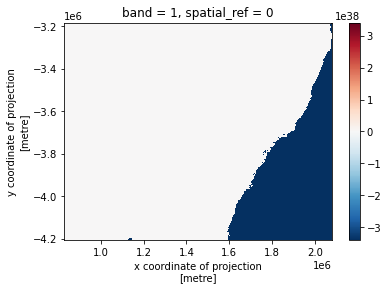

In [19]:
data_raster_resampled_match.plot()

In [23]:
%%timeit
data_raster.rio.reproject_match(grid_raster_reprojected)

2.53 s ± 68.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [10]:
%%memit
data_raster.rio.clip_box(*grid_raster_reprojected.rio.bounds())

peak memory: 1345.30 MiB, increment: 0.30 MiB


In [25]:
%%timeit
data_raster.rio.clip_box(*grid_raster_reprojected.rio.bounds())

16.4 ms ± 600 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [27]:
data_box_clipped = data_raster.rio.clip_box(*grid_raster_reprojected.rio.bounds())
data_box_clipped

<xarray.DataArray (band: 1, y: 1023, x: 1253)>
array([[[ 0.000000e+00,  0.000000e+00, ..., -3.402823e+38, -3.402823e+38],
        [ 0.000000e+00,  0.000000e+00, ..., -3.402823e+38, -3.402823e+38],
        ...,
        [ 0.000000e+00,  0.000000e+00, ..., -3.402823e+38, -3.402823e+38],
        [ 0.000000e+00,  0.000000e+00, ..., -3.402823e+38, -3.402823e+38]]],
      dtype=float32)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 8.285e+05 8.295e+05 8.305e+05 ... 2.08e+06 2.08e+06
  * y            (y) float64 -3.184e+06 -3.186e+06 ... -4.206e+06 -4.206e+06
    spatial_ref  int64 0
Attributes:
    SourceBandIndex:  0
    scale_factor:     1.0
    add_offset:       0.0
    _FillValue:       -3.402823e+38

In [38]:
data_raster = data_raster.sel(band=1)
data_raster

<xarray.DataArray (y: 4100, x: 7401)>
array([[-3.402823e+38, -3.402823e+38, -3.402823e+38, ..., -3.402823e+38,
        -3.402823e+38, -3.402823e+38],
       [-3.402823e+38, -3.402823e+38, -3.402823e+38, ..., -3.402823e+38,
        -3.402823e+38, -3.402823e+38],
       [-3.402823e+38, -3.402823e+38, -3.402823e+38, ..., -3.402823e+38,
        -3.402823e+38, -3.402823e+38],
       ...,
       [-3.402823e+38, -3.402823e+38, -3.402823e+38, ..., -3.402823e+38,
        -3.402823e+38, -3.402823e+38],
       [-3.402823e+38, -3.402823e+38, -3.402823e+38, ..., -3.402823e+38,
        -3.402823e+38, -3.402823e+38],
       [-3.402823e+38, -3.402823e+38, -3.402823e+38, ..., -3.402823e+38,
        -3.402823e+38, -3.402823e+38]], dtype=float32)
Coordinates:
    band         int64 1
  * x            (x) float64 -3.9e+06 -3.9e+06 -3.898e+06 ... 3.498e+06 3.5e+06
  * y            (y) float64 -1e+06 -1.002e+06 ... -5.098e+06 -5.1e+06
    spatial_ref  int64 0
Attributes:
    SourceBandIndex:  0
    _FillValue:       -3.4028230607370965e+38
    scale_factor:     1.0
    add_offset:       0.0

In [11]:
%%memit
data_raster.sel(x=grid_raster_reprojected.x, y=grid_raster_reprojected.y, method="nearest")

peak memory: 1347.45 MiB, increment: 2.07 MiB


In [47]:
%%timeit
data_raster.sel(x=grid_raster_reprojected.x, y=grid_raster_reprojected.y, method="nearest")

514 ms ± 42.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [32]:
import numpy as np

In [35]:
print(grid_raster_reprojected.x.min().item() >= data_raster.x.min().item())
print(grid_raster_reprojected.x.max().item() <= data_raster.x.max().item())
print(grid_raster_reprojected.y.min().item() >= data_raster.y.min().item())
print(grid_raster_reprojected.y.max().item() <= data_raster.y.max().item())

True
True
True
True


In [26]:
from xrspatial.focal import focal_stats

In [48]:
kernel = np.array(
    [[0, 1, 0],
     [1, 1, 1],
     [0, 1, 0]]
)

In [49]:
%%memit
focal_stats(data_raster, kernel, ['mean'])

peak memory: 14318.86 MiB, increment: 466.34 MiB


In [50]:
focal_stats(data_raster, kernel, ['mean'])

<xarray.DataArray (stats: 1, y: 4100, x: 7401)>
array([[[-3.40282306e+38, -3.40282306e+38, -3.40282306e+38, ...,
         -3.40282306e+38, -3.40282306e+38, -3.40282306e+38],
        [-3.40282306e+38, -3.40282306e+38, -3.40282306e+38, ...,
         -3.40282306e+38, -3.40282306e+38, -3.40282306e+38],
        [-3.40282306e+38, -3.40282306e+38, -3.40282306e+38, ...,
         -3.40282306e+38, -3.40282306e+38, -3.40282306e+38],
        ...,
        [-3.40282306e+38, -3.40282306e+38, -3.40282306e+38, ...,
         -3.40282306e+38, -3.40282306e+38, -3.40282306e+38],
        [-3.40282306e+38, -3.40282306e+38, -3.40282306e+38, ...,
         -3.40282306e+38, -3.40282306e+38, -3.40282306e+38],
        [-3.40282306e+38, -3.40282306e+38, -3.40282306e+38, ...,
         -3.40282306e+38, -3.40282306e+38, -3.40282306e+38]]])
Coordinates:
    band         int64 1
  * x            (x) float64 -3.9e+06 -3.9e+06 -3.898e+06 ... 3.498e+06 3.5e+06
  * y            (y) float64 -1e+06 -1.002e+06 ... -5.098e+06 -5.1e+06
    spatial_ref  int64 0
  * stats        (stats) object 'mean'
Attributes:
    SourceBandIndex:  0
    _FillValue:       -3.4028230607370965e+38
    scale_factor:     1.0
    add_offset:       0.0

In [51]:
%%timeit
focal_stats(data_raster, kernel, ['mean'])

1.69 s ± 46.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
dim = 9
radius = (dim - 1) / 2
tmp = np.zeros((dim, dim))
center = (4, 4)


In [53]:
row, col = np.indices((2, 3))
row

array([[0, 0, 0],
       [1, 1, 1]])

In [54]:
col

array([[0, 1, 2],
       [0, 1, 2]])

In [73]:
from itertools import combinations, combinations_with_replacement, permutations, product

In [71]:
list(combinations_with_replacement(range(2), 2))

[(0, 0), (0, 1), (1, 1)]

In [72]:
list(combinations(range(2), 2))

[(0, 1)]

In [85]:
np.array(list(product(range(2), repeat=2)))

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [ ]:
big_kernel = np.array(
    [[0, 1, 0],
     [1, 1, 1],
     [0, 1, 0]]
)
focal_stats(data_raster, big_kernel, ['mean'])

In [91]:
from scipy.ndimage import gaussian_filter
dim = 3
tmp = np.zeros((dim, dim))
tmp[int((dim - 1) / 2) : int((dim - 1) / 2)] = 1
gaussian_filter(tmp, sigma=0.4)

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [94]:
np.arange(0, 9, 1)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [103]:
np.arange(-2, 5, 1)

array([-2, -1,  0,  1,  2,  3,  4])

In [101]:
from scipy import interpolate

x = np.array(range(3))
kernel3by3 = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]])
kernel3by3
xx, yy = np.meshgrid(x, x)
f = interpolate.interp2d(x, x, kernel3by3, kind='linear')

In [102]:
kernel3by3

array([[0, 1, 0],
       [1, 1, 1],
       [0, 1, 0]])

In [104]:
xnew = np.arange(-2, 5, 1)
# ynew = np.linspace(0, 2, 4)
znew = f(xnew, xnew)
znew

array([[0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.]])

In [105]:
from skimage.transform import resize

In [107]:
resize(kernel3by3, (5, 5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [117]:
dim = 5
x = np.arange(0, dim, 1)
# y = np.arange(0, dim, 1)
xx, yy = np.meshgrid(x, x)
x_centre = int((dim - 1) / 2)
# y_centre = int((dim - 1) / 2)
mask = np.sqrt((xx - x_centre)**2 + (yy - x_centre)**2)

In [119]:
mask

array([[2.82842712, 2.23606798, 2.        , 2.23606798, 2.82842712],
       [2.23606798, 1.41421356, 1.        , 1.41421356, 2.23606798],
       [2.        , 1.        , 0.        , 1.        , 2.        ],
       [2.23606798, 1.41421356, 1.        , 1.41421356, 2.23606798],
       [2.82842712, 2.23606798, 2.        , 2.23606798, 2.82842712]])

In [128]:
out = np.zeros((dim, dim))
out

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [130]:
out[mask <= x_centre] = 1
out

array([[0., 0., 1., 0., 0.],
       [0., 1., 1., 1., 0.],
       [1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 0.],
       [0., 0., 1., 0., 0.]])

In [113]:
# kernel_7by7 = mask(np.arange(0, 7, 1), np.arange(0, 7, 1))
mask(np.arange(0, 7, 1), np.arange(0, 7, 1))

TypeError: 'numpy.ndarray' object is not callable

In [12]:
import matplotlib.pyplot as plt

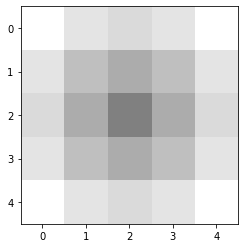

In [118]:
plt.imshow(mask, cmap="gray", alpha = 0.5)

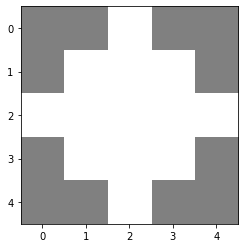

In [131]:
plt.imshow(out, cmap="gray", alpha = 0.5)

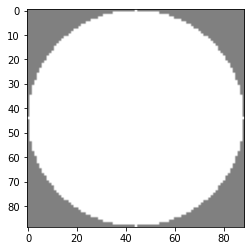

In [132]:
dim = 89
x = np.arange(0, dim, 1)
# y = np.arange(0, dim, 1)
xx, yy = np.meshgrid(x, x)
x_centre = int((dim - 1) / 2)
# y_centre = int((dim - 1) / 2)
mask = np.sqrt((xx - x_centre)**2 + (yy - x_centre)**2)
out = np.zeros((dim, dim))
out[mask <= x_centre] = 1
plt.imshow(out, cmap="gray", alpha = 0.5)

In [133]:
%%timeit
focal_stats(data_raster, out, ['mean'])

13min 45s ± 16.7 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [135]:
%%time
focal_stats(data_raster, out, ['mean'])

CPU times: user 14min 11s, sys: 232 ms, total: 14min 11s
Wall time: 14min 12s


<xarray.DataArray (stats: 1, y: 4100, x: 7401)>
array([[[-3.40282306e+38, -3.40282306e+38, -3.40282306e+38, ...,
         -3.40282306e+38, -3.40282306e+38, -3.40282306e+38],
        [-3.40282306e+38, -3.40282306e+38, -3.40282306e+38, ...,
         -3.40282306e+38, -3.40282306e+38, -3.40282306e+38],
        [-3.40282306e+38, -3.40282306e+38, -3.40282306e+38, ...,
         -3.40282306e+38, -3.40282306e+38, -3.40282306e+38],
        ...,
        [-3.40282306e+38, -3.40282306e+38, -3.40282306e+38, ...,
         -3.40282306e+38, -3.40282306e+38, -3.40282306e+38],
        [-3.40282306e+38, -3.40282306e+38, -3.40282306e+38, ...,
         -3.40282306e+38, -3.40282306e+38, -3.40282306e+38],
        [-3.40282306e+38, -3.40282306e+38, -3.40282306e+38, ...,
         -3.40282306e+38, -3.40282306e+38, -3.40282306e+38]]])
Coordinates:
    band         int64 1
  * x            (x) float64 -3.9e+06 -3.9e+06 -3.898e+06 ... 3.498e+06 3.5e+06
  * y            (y) float64 -1e+06 -1.002e+06 ... -5.098e+06 -5.1e+06
    spatial_ref  int64 0
  * stats        (stats) object 'mean'
Attributes:
    SourceBandIndex:  0
    _FillValue:       -3.4028230607370965e+38
    scale_factor:     1.0
    add_offset:       0.0

In [136]:
np.mean(grid_raster_reprojected.x.values - np.roll(grid_raster_reprojected.x.values, 1))

1.0564003795547623e-14

In [14]:
from xrspatial.convolution import circle_kernel, calc_cellsize

In [15]:
calc_cellsize(data_raster.sel(band=1))

(1000.0, 1000.0)

In [16]:
calc_cellsize(grid_raster_reprojected.sel(band=1))

(113.66054423778407, 113.66054423778401)

In [20]:
k = circle_kernel(1, 1, 44)
k

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

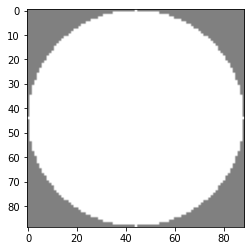

In [21]:
plt.imshow(k, cmap="gray", alpha = 0.5)

In [22]:
k.shape

(89, 89)

1000.0 1000.0
(20001, 20001)


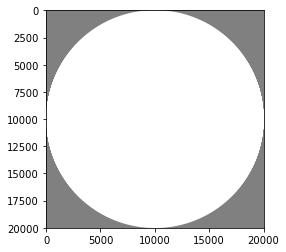

In [23]:
pix_width, pix_height = calc_cellsize(data_raster.sel(band=1))
print(pix_width, pix_height)
k = circle_kernel(1, 1, 10_000)
print(k.shape)
plt.imshow(k, cmap="gray", alpha = 0.5)

In [25]:
riox.open_rasterio('/home/srg/Documents/Projects/nowcasting-soil-moisture/data/rain/2001.daily_rain.nc').rio.crs is None

True